In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
data_merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
drug_regimen_group = data_merged.groupby("Drug Regimen")
drug_regimen_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each Regimen
tumor_vol = drug_regimen_group['Tumor Volume (mm3)']
tumor_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
#tumor_mean = np.mean(tumor_vol)
tumor_median = drug_regimen_group['Tumor Volume (mm3)'].median()
tumor_var = drug_regimen_group['Tumor Volume (mm3)'].var()
tumor_stdev = drug_regimen_group['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen_group['Tumor Volume (mm3)'].sem()
regimen_count = drug_regimen_group['Drug Regimen'].count()


In [9]:
drug_regimen_sum = pd.DataFrame(
            {"Tumor Vol_mean" : tumor_mean,
             "Tumor Vol_median" : tumor_median,
             "Tumor Vol_var" : tumor_var,
             "Tumor Vol_std dev" : tumor_stdev,
             "Tumor Vol_SEM" : tumor_sem,
             "Regimen Count": regimen_count}
)
drug_regimen_sum.head()

,Tumor Vol_mean,Tumor Vol_median,Tumor Vol_var,Tumor Vol_std dev,Tumor Vol_SEM,Regimen Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186


In [10]:
print(drug_regimen_sum)

              Tumor Vol_mean  Tumor Vol_median  Tumor Vol_var  \
Drug Regimen                                                    
Capomulin          40.675741         41.557809      24.947764   
Ceftamin           52.591172         51.776157      39.290177   
Infubinol          52.884795         51.820584      43.128684   
Ketapril           55.235638         53.698743      68.553577   
Naftisol           54.331565         52.509285      66.173479   
Placebo            54.033581         52.288934      61.168083   
Propriva           52.322552         50.854632      42.351070   
Ramicane           40.216745         40.673236      23.486704   
Stelasyn           54.233149         52.431737      59.450562   
Zoniferol          53.236507         51.818479      48.533355   

              Tumor Vol_std dev  Tumor Vol_SEM  Regimen Count  
Drug Regimen                                                   
Capomulin              4.994774       0.329346            230  
Ceftamin               6.26

([<matplotlib.axis.XTick at 0x2667ff53608>,
 <a list of 10 Text xticklabel objects>)

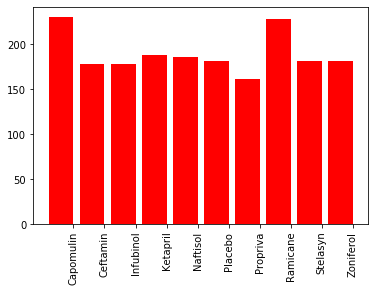

In [11]:
x_axis = np.arange(len(drug_regimen_sum))
xticks =["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, drug_regimen_sum["Regimen Count"], color ='r')
plt.xticks(tick_locations, xticks, rotation = 'vertical')


In [12]:
print(regimen_count)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


In [13]:
x_axis = len(regimen_count)

Text(0, 0.5, '# of treatments')

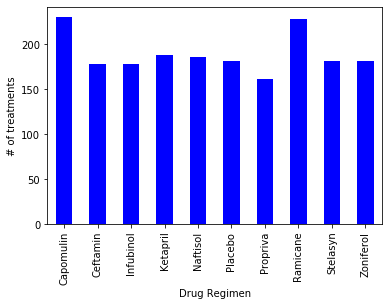

In [14]:
ax = regimen_count.plot(kind="bar", color = 'b')
ax.set_ylabel("# of treatments")

In [15]:
gender_group = data_merged.groupby("Sex")
#drug_regimen_group.head()
gender_count = gender_group['Sex'].count()
print(gender_count)

Sex
Female    935
Male      958
Name: Sex, dtype: int64


In [16]:
gender = ['Female', 'Male']
colors = ['red', 'blue']
explode = [0.1,0]

<function matplotlib.pyplot.show(*args, **kw)>

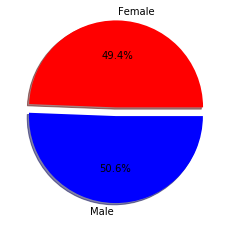

In [48]:
plt.pie(gender_count,labels=gender, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True)#, startangle=140)
plt.show

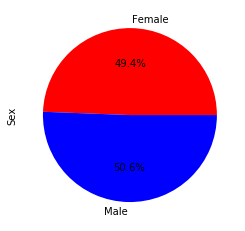

In [18]:
# mouse by gender pie chart using pandas
gender_count.plot.pie(colors=['r','b'], autopct='%.1f%%')

In [19]:
mouse_gp = study_results.groupby("Mouse ID")
mouse_gp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1107,x401,20,36.065835,0
1108,m269,20,61.145866,0
1109,a963,20,51.463734,0
1110,p189,20,56.530204,3


In [20]:
sresults_sorted = data_merged .sort_values(by=['Mouse ID', 'Timepoint'])
print(sresults_sorted)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
454      a203    Infubinol  Female          20          23          0   
455      a203    Infubinol  Female          20          23          5   
456      a203    Infubinol  Female          20          23         10   
457      a203    Infubinol  Female          20          23         15   
458      a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
454            45.000000                 0  
455            48.508468         

In [21]:
df=sresults_sorted.groupby("Mouse ID").tail(1)

In [22]:
df1 = pd.DataFrame(df, columns = ['Mouse ID','Tumor Volume (mm3)', 'Drug Regimen'])
cap_df = df1[df1['Drug Regimen'] == 'Capomulin']
print(cap_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
309      b128           38.982878    Capomulin
299      b742           38.939633    Capomulin
64       f966           30.485985    Capomulin
244      g288           37.074024    Capomulin
360      g316           40.159220    Capomulin
440      i557           47.685963    Capomulin
204      i738           37.311846    Capomulin
337      j119           38.125164    Capomulin
317      j246           38.753265    Capomulin
380      l509           41.483008    Capomulin
282      l897           38.846876    Capomulin
39       m601           28.430964    Capomulin
144      m957           33.329098    Capomulin
1455     r157           46.539206    Capomulin
134      r554           32.377357    Capomulin
390      r944           41.581521    Capomulin
19       s185           23.343598    Capomulin
370      s710           40.728578    Capomulin
164      t565           34.455298    Capomulin
104      u364           31.023923    Capomulin
350      v923

In [23]:
cap_vol = cap_df['Tumor Volume (mm3)']
cap_qtr = cap_vol.quantile([.25, .5, .75]) 
cap_low = cap_qtr[0.25]
cap_mid = cap_qtr[0.5]
cap_high = cap_qtr[0.75]
cap_iqr = cap_high - cap_low
print(cap_low)
print(cap_mid)
print(cap_high)
print(cap_iqr)

32.37735684
38.125164399999996
40.1592203
7.781863460000004


In [24]:
ram_df = df1[df1['Drug Regimen'] == 'Ramicane']
print(ram_df)

    Mouse ID  Tumor Volume (mm3) Drug Regimen
327     a411           38.407618     Ramicane
430     a444           43.047543     Ramicane
214     a520           38.810366     Ramicane
174     a644           32.978522     Ramicane
289     c458           38.342008     Ramicane
154     c758           33.397653     Ramicane
272     d251           37.311236     Ramicane
400     e662           40.659006     Ramicane
49      g791           29.128472     Ramicane
184     i177           33.562402     Ramicane
254     i334           36.374510     Ramicane
94      j913           31.560470     Ramicane
194     j989           36.134852     Ramicane
9       k403           22.050126     Ramicane
74      m546           30.564625     Ramicane
114     n364           31.095335     Ramicane
420     q597           45.220869     Ramicane
262     q610           36.561652     Ramicane
234     r811           37.225650     Ramicane
447     r921           43.419381     Ramicane
59      s508           30.276232  

In [25]:
ram_vol = ram_df['Tumor Volume (mm3)']
ram_qtr = ram_vol.quantile([.25, .5, .75]) 
ram_low = ram_qtr[0.25]
ram_mid = ram_qtr[0.5]
ram_high = ram_qtr[0.75]
ram_iqr = ram_high - ram_low
print(ram_low)
print(ram_mid)
print(ram_high)
print(ram_iqr)

31.56046955
36.56165229
40.65900627
9.098536719999998


In [26]:
inf_df = df1[df1['Drug Regimen'] == 'Infubinol']
print(inf_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
463      a203           67.973419    Infubinol
473      a251           65.525743    Infubinol
530      a577           57.031862    Infubinol
540      a685           66.083066    Infubinol
637      c139           72.226731    Infubinol
669      c326           36.321346    Infubinol
742      c895           60.969711    Infubinol
800      e476           62.435404    Infubinol
834      f345           60.918767    Infubinol
949      i386           67.289621    Infubinol
1053     k483           66.196912    Infubinol
1076     k804           62.117279    Infubinol
1205     m756           47.010364    Infubinol
1225     n671           60.165180    Infubinol
1312     o809           55.629428    Infubinol
1314     o813           45.699331    Infubinol
1397     q132           54.656549    Infubinol
1485     s121           55.650681    Infubinol
1616     v339           46.250112    Infubinol
1632     v719           54.048608    Infubinol
1640     v766

In [27]:
inf_vol = inf_df['Tumor Volume (mm3)']
inf_qtr = inf_vol.quantile([.25, .5, .75]) 
inf_low = inf_qtr[0.25]
inf_mid = inf_qtr[0.5]
inf_high = inf_qtr[0.75]
inf_iqr = inf_high - inf_low
print(inf_low)
print(inf_mid)
print(inf_high)
print(inf_iqr)

54.04860769
60.16518046
65.52574285
11.477135160000003


In [28]:
cef_df = df1[df1['Drug Regimen'] == 'Ceftamin']
print(cef_df)

     Mouse ID  Tumor Volume (mm3) Drug Regimen
493      a275           62.999356     Ceftamin
594      b447           45.000000     Ceftamin
600      b487           56.057749     Ceftamin
617      b759           55.742829     Ceftamin
840      f436           48.722078     Ceftamin
940      h531           47.784682     Ceftamin
993      j296           61.849023     Ceftamin
1033     k210           68.923185     Ceftamin
1112     l471           67.748662     Ceftamin
1119     l490           57.918381     Ceftamin
1122     l558           46.784535     Ceftamin
1132     l661           59.851956     Ceftamin
1162     l733           64.299830     Ceftamin
1260     o287           59.741901     Ceftamin
1379     p438           61.433892     Ceftamin
1406     q483           64.192341     Ceftamin
1551     t573           45.000000     Ceftamin
1582     u149           52.925348     Ceftamin
1583     u153           45.000000     Ceftamin
1670     w151           67.527482     Ceftamin
1743     x226

In [29]:
cef_vol = cef_df['Tumor Volume (mm3)']
cef_qtr = cef_vol.quantile([.25, .5, .75]) 
cef_low = cef_qtr[0.25]
cef_mid = cef_qtr[0.5]
cef_high = cef_qtr[0.75]
cef_iqr = cef_high - cef_low
print(cef_low)
print(cef_mid)
print(cef_high)
print(cef_iqr)

48.72207785
59.85195552
64.29983003
15.577752179999997


<function matplotlib.pyplot.show(*args, **kw)>

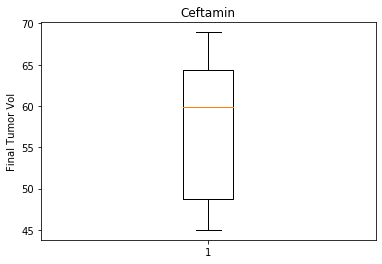

In [30]:
cef_vol = cef_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.boxplot(cef_vol)
ax1.set_title('Ceftamin')
ax1.set_ylabel('Final Tumor Vol')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

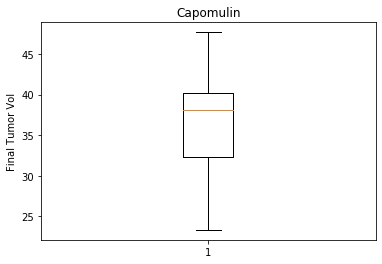

In [31]:
cap_vol = cap_df['Tumor Volume (mm3)']
fig2, ax2 = plt.subplots()
ax2.boxplot(cap_vol)
ax2.set_title('Capomulin')
ax2.set_ylabel('Final Tumor Vol')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

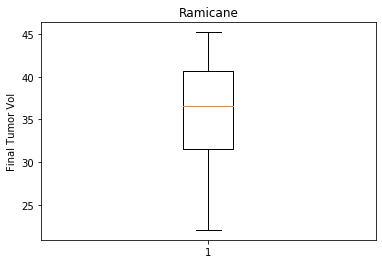

In [32]:
ram_vol = ram_df['Tumor Volume (mm3)']
fig3, ax3 = plt.subplots()
ax3.boxplot(ram_vol)
ax3.set_title('Ramicane')
ax3.set_ylabel('Final Tumor Vol')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

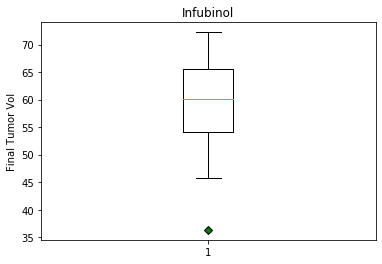

In [39]:
green_diamond = dict(markerfacecolor='g', marker='D')
inf_vol = inf_df['Tumor Volume (mm3)']
fig4, ax4 = plt.subplots()
#ax4.boxplot(inf_vol)
ax4.set_title('Infubinol')
ax4.set_ylabel('Final Tumor Vol')
ax4.boxplot(inf_vol, flierprops=green_diamond)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

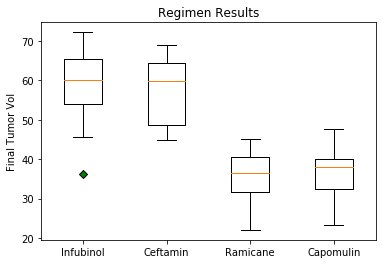

In [49]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig5, ax5 = plt.subplots()
ax5.boxplot( [inf_vol, cef_vol, ram_vol, cap_vol], flierprops=green_diamond)   
ax5.set_title('Regimen Results')
ax5.set_ylabel('Final Tumor Vol')
plt.xticks([1, 2, 3, 4], ['Infubinol', 'Ceftamin', 'Ramicane','Capomulin'])
plt.show
